# M7T01, Exercicis d'algoritmes de Classificació.

**Informació rellevant:**

- Aquestes dades són els resultats d'una anàlisi química de vins cultivats a la mateixa regió d'Itàlia però derivats de tres cultivars diferents. L'anàlisi va determinar les quantitats de 13 constituents que es troben a cadascun dels tres tipus de vins.

- Els atributs són:
   1) alcohol
   2) àcid màlic
   3) cendre
   4) clcalinitat de la cendra
   5) magnesi
   6) fenols totals
   7) flavonoides
   8) fenols no flavonoides
   9) proantocianines
   10) intensitat de color
   11) tonalitat
   12) OD280/OD315 de vins diluïts
   13) prolina

- Nombre d'instàncies:
     - Classe 1: 59
     - Classe 2: 71
     - Classe 3: 48

- Nombre d'atributs: 13

- Per a cada atribut:
     - Tots els atributs són continus.
     - No hi ha estadístiques disponibles, però se suggereix estandarditzar variables per a certs usos (per exemple, per a nosaltres amb classificadors que NO són invariants d'escala)

- Valors d'atributs que falten: Cap

- Distribució de classes: nombre d'instàncies per classe
     - Classe 1: 59
     - Classe 2: 71
     - Classe 3: 48

In [1]:
# Després de fer recerca sobre el tema de la base de dades i les seves columnes sabem que:
info_columnes = {
    'alcohol' : 'percentatge d alcohol present al vi',
    'malic_acid' : 'àcid orgànic present al raïm i que contribueix a l acidesa del vi',
    'ash' : 'quantitat de residus inorgànics deixats després de cremar el vi',
    'alcal_ash' : ' mesura de l alcalinitat dels residus inorgànics presents al vi',
    'magnesi' : 'quantitat de magnesi present al vi',
    'total_phenols' : 'Els fenols són compostos químics que es troben al raïm i que poden influir en el sabor, color i estructura del vi. Aquesta variable representa la suma total dels fenols presents.',
    'flavanoids' : ' un tipus de fenols que es troben al raïm i que poden tenir propietats antioxidants. Aquests compostos contribueixen a les característiques organolèptiques del vi.',
    'nonflavanoid_phenols' : 'altre grup de fenols presents al vi que no són flavonoides',
    'proanthocyanins'  : 'altre tipus de compostos fenòlics que es troben en el vi i que poden contribuir a la seva estructura i astringència.',
    'color_intensity' : 'La intensitat o concentració del color del vi, que pot variar des de tons més clars fins a tons més foscos.',
    'hue' : 'El matís o to del color del vi, que pot variar des de tons més vermellosos fins a tons més violacis o ataronjats.',
    'OD_diluted_wines' : 'OD280/OD315 de vins diluïts: Aquesta variable representa la relació d absorbància entre les longituds d ona 280 i 315 nanòmetres, i pot proporcionar informació sobre la quantitat de compostos presents al vi, com els pigments i les proteïnes.',
    'proline' : 'aminoàcid present al raïm i que pot influir en el sabor i l estructura del vi. La seva concentració es fa servir com un indicador de la maduresa del raïm i pot variar segons el tipus de vi',
}

# Aquestes variables químiques són utilitzades comunament en l'anàlisi i la descripció de vins
# poden proporcionar informació sobre diferents aspectes de la seva composició i característiques organolèptiques.

_________

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.stats as stats

In [3]:
# configurar els gràfics
sns.set_style('whitegrid')
sns.set_palette('flare')

In [4]:
# Llegir l'arxiu
rawwine = pd.read_csv("C:/Users/Patricia/Downloads/wineData.txt", sep=',', header=None,
                 names=['class', 'alcohol', 'malic_acid', 'ash', 'alcal_ash', 'magnesium', 'total_phenols', 'flavanoids',
                        'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD_diluted_wines',
                        'proline'])

In [5]:
wine = pd.DataFrame(rawwine)

## Preprocessat

### Revisem la distribució

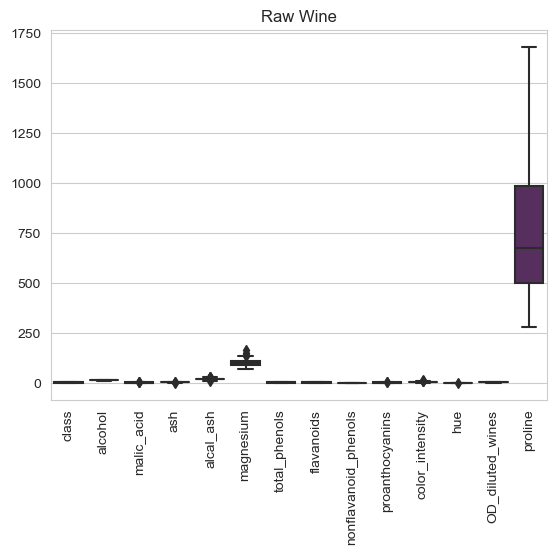

In [6]:
# A tot el dataset
sns.boxplot(data=wine, palette='flare')
plt.title('Raw Wine')
plt.xticks(rotation=90)
plt.show()

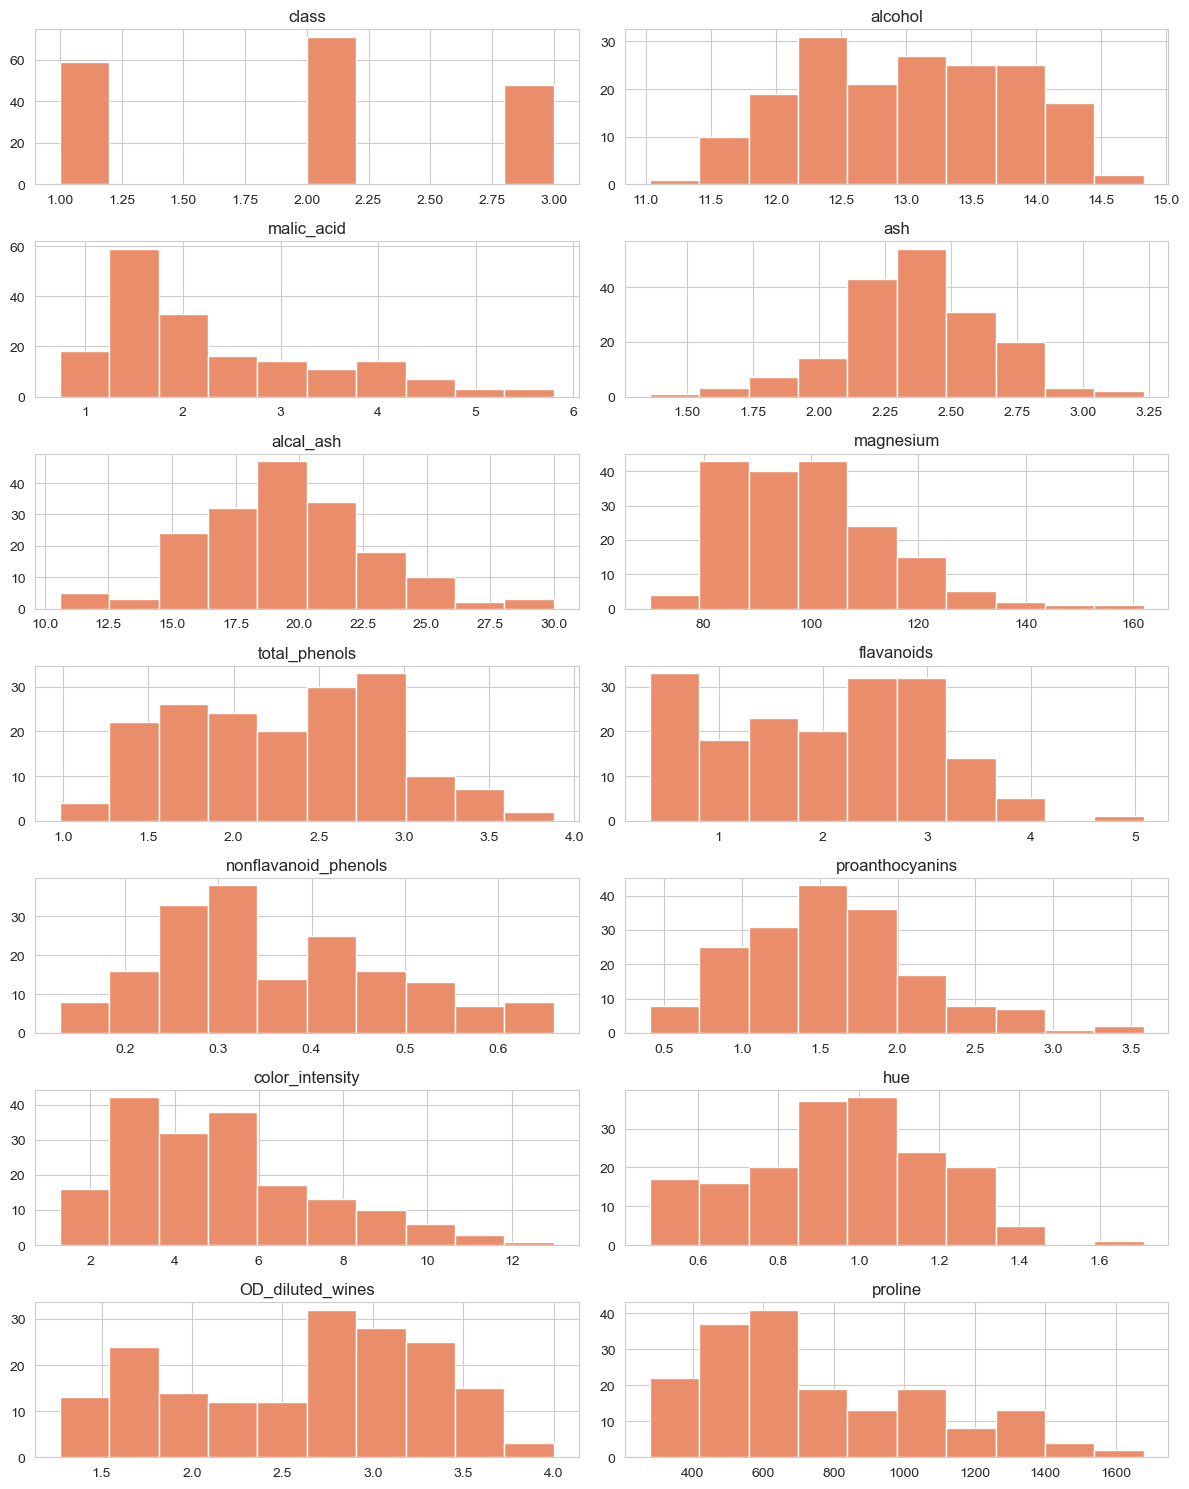

In [7]:
#Per cada variable

# Crear una figura i eixos per als subplots
fig, axs = plt.subplots(7, 2, figsize=(12, 15))

# Iterar sobre les columnes i generar els histogrames
axs = axs.ravel()

# Iterar sobre les columnes i generar els histogrames
for i, columna in enumerate(wine.columns):
    # Generar l'histograma per a la columna actual
    axs[i].hist(wine[columna], bins=10)
    
    # Establir el títol de la columna a l'histograma
    axs[i].set_title(columna)

    # Ajustar l'índex per mostrar dos histogrames per fila
    if (i+1) % 2 == 0:
        plt.subplots_adjust(hspace=0.4)

# Ajustar l'espai entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

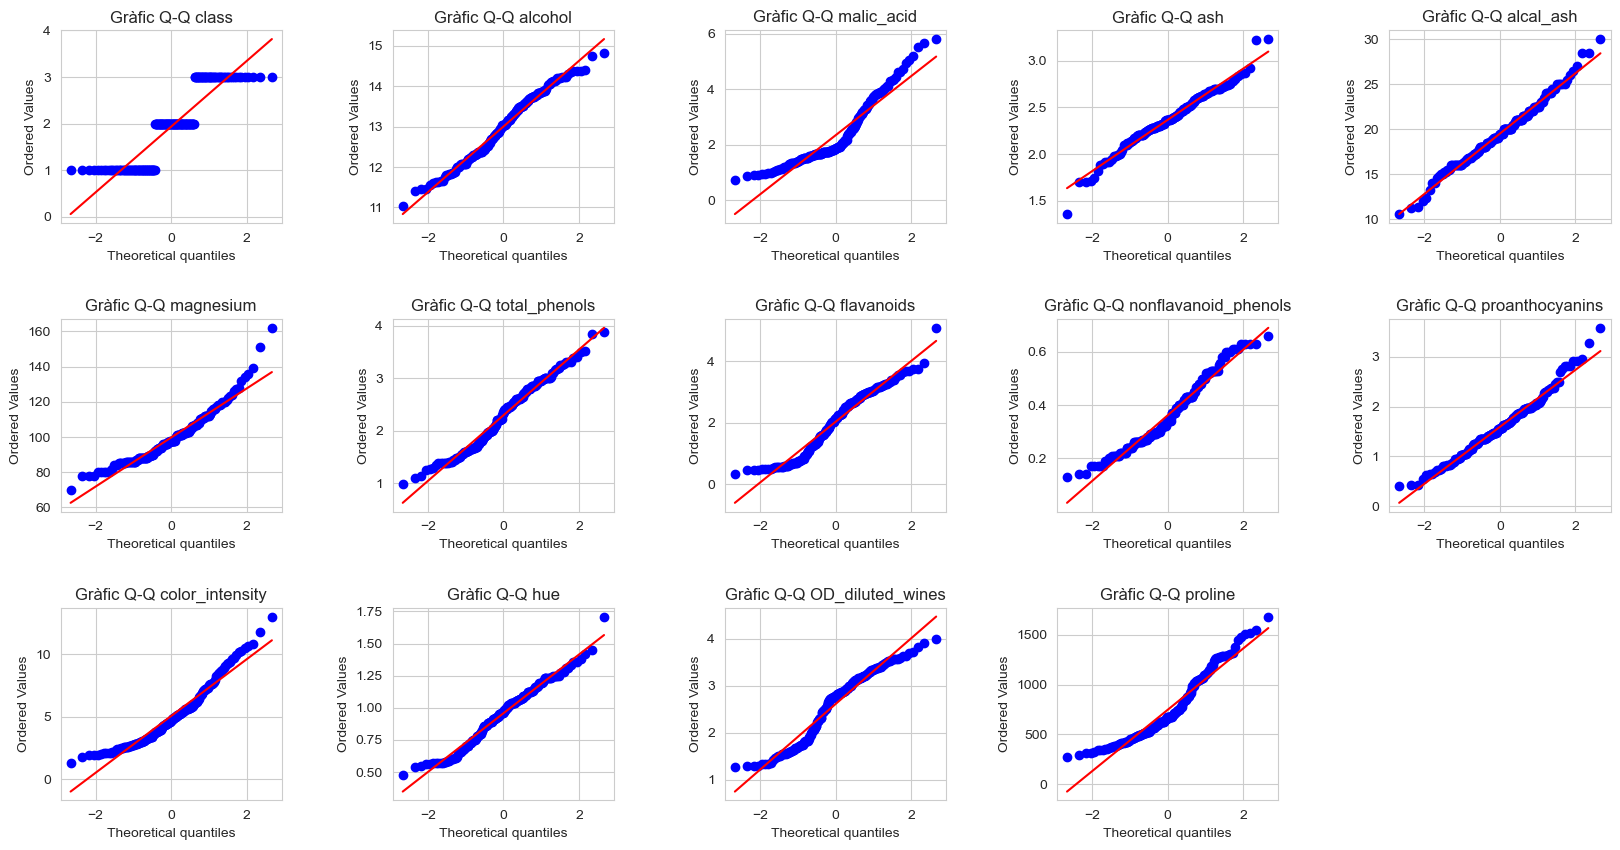

In [8]:
# Q-Q Plot

fig, axes = plt.subplots(3, 5, figsize=(20, 10))

# Iteració sobre les columnes del conjunt de dades 'wine' i els eixos corresponents
for idx, (col, ax) in enumerate(zip(wine.columns, axes.flatten())):
    # Generació de la gràfica Q-Q utilitzant stats.probplot
    stats.probplot(wine[col], dist='norm', plot=ax)
    
    # Ajustament dels espais entre subgràfiques
    plt.subplots_adjust(wspace=.5, hspace=.5)
    
    # Establiment del títol de la gràfica Q-Q amb el nom de la columna
    ax.set_title("Gràfic Q-Q " + col)

# Amagar els eixos addicionals si no hi ha columnes suficients per omplir totes les subgràfiques
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

### Normalitat

In [75]:
from scipy.stats import kstest

alpha: 0.5

for variable in wine:
    stat, p_value = kstest(wine[variable], 'norm')
    
    print("Variable:", variable)
    print("Estadístic de prova:", stat)
    print("Valor p:", p_value)
    print()

Variable: class
Estadístic de prova: 0.8413447460685429
Valor p: 4.0511853182365685e-142

Variable: alcohol
Estadístic de prova: 0.06854144954910629
Valor p: 0.35686679600830495

Variable: malic_acid
Estadístic de prova: 0.5062066427537972
Valor p: 8.882111137496932e-43

Variable: ash
Estadístic de prova: 0.057886506517667
Valor p: 0.569674742844197

Variable: alcal_ash
Estadístic de prova: 0.06332274740488919
Valor p: 0.45468651761445567

Variable: magnesium
Estadístic de prova: 0.16881143448634384
Valor p: 6.65378184779014e-05

Variable: total_phenols
Estadístic de prova: 0.5202353784109569
Valor p: 2.4370737381476097e-45

Variable: flavanoids
Estadístic de prova: 0.16819989032161053
Valor p: 7.169438084492584e-05

Variable: nonflavanoid_phenols
Estadístic de prova: 0.5132263599497551
Valor p: 4.76875604835415e-44

Variable: proanthocyanins
Estadístic de prova: 0.08478218658005479
Valor p: 0.1460699996964837

Variable: color_intensity
Estadístic de prova: 0.16333844668082084
Valor p:

### Correlació

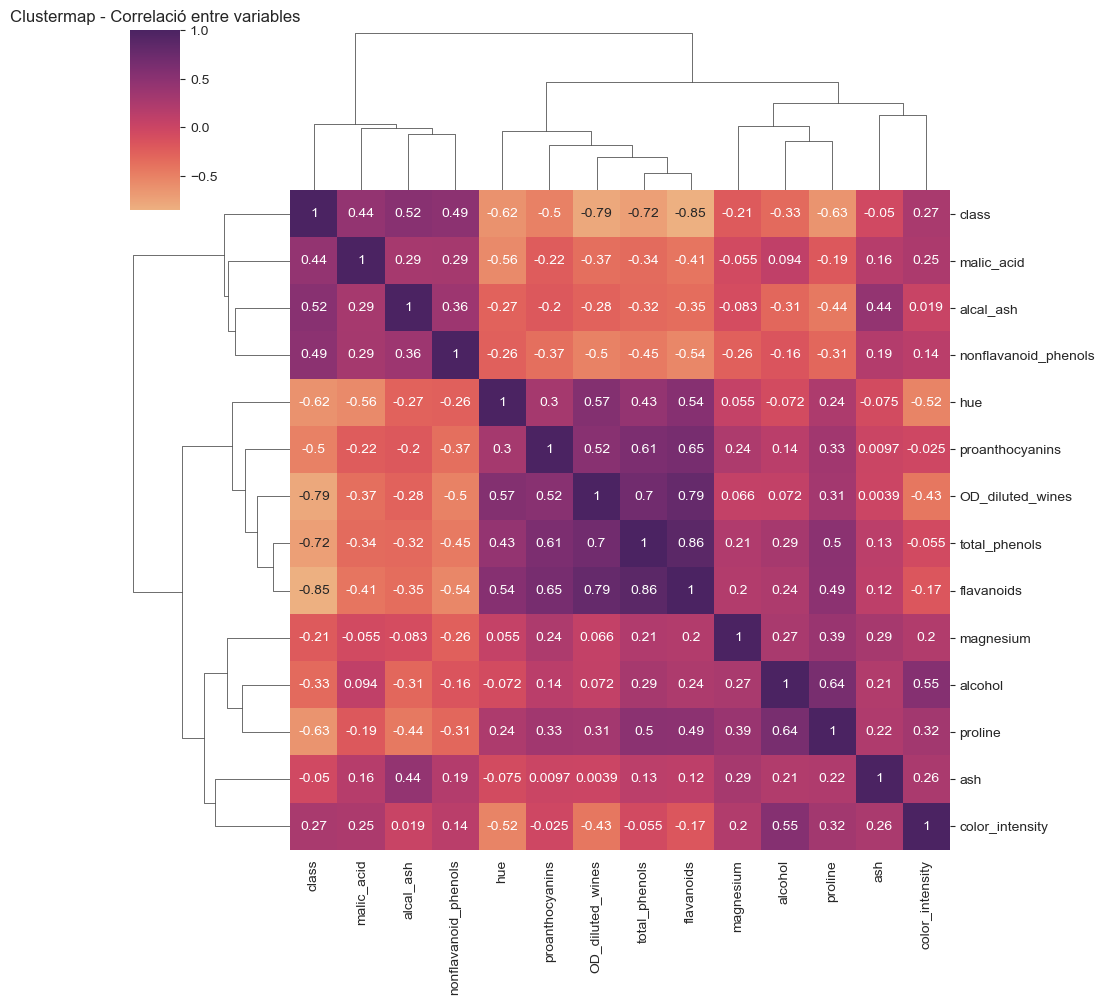

In [10]:
sns.clustermap(wine.corr(), annot=True, cmap='flare')
plt.title('Clustermap - Correlació entre variables')
plt.show()

___________

##### StandardScaler

L'StandardScaler de scikit-learn és una tècnica de pre-processament de dades utilitzada per a l'escalatge de característiques en un conjunt de dades. La seva funció principal és estandarditzar les característiques per a tenir una mitjana de zero i una desviació estàndard de 1.

In [11]:
from sklearn.preprocessing import StandardScaler
wine[['alcohol','ash','alcal_ash']] = StandardScaler().fit_transform(wine[['alcohol','ash','alcal_ash']])

##### RobustScaler


El RobustScaler de scikit-learn és una tècnica de pre-processament de dades utilitzada per a l'escalatge de característiques (variables) en un conjunt de dades. La seva funció principal és adaptar les característiques per a ser més resistents a valors atípics o outliers presents en les dades.

A diferència d'altres mètodes d'escalatge, com ara l'escalatge estàndard (StandardScaler), el RobustScaler utilitza estimadors de la mediana i el rang interquartílic per a realitzar l'escalatge. Això permet que el RobustScaler sigui més robust davant de valors atípics en les dades.

In [12]:
from sklearn.preprocessing import RobustScaler
wine[['magnesium','color_intensity','flavanoids','proanthocyanins','hue']] = RobustScaler().fit_transform(wine[['magnesium','color_intensity','flavanoids','proanthocyanins','hue']])

##### MinMaxScaler

El MinMaxScaler de scikit-learn és una tècnica de pre-processament de dades que s'utilitza per a l'escalatge de característiques en un conjunt de dades. La seva funció principal és transformar les característiques per a ajustar-les en un rang específic.

Aquest procés assegura que totes les característiques estiguen en el mateix rang específic. És especialment útil quan tenim característiques amb diferents amplituds i volem que totes elles estiguen contingudes en un rang determinat. El MinMaxScaler preserva les relacions de proporcionalitat entre els valors originals, de manera que les proporcions relatives entre les dades es mantenen després de l'escalatge.

El MinMaxScaler és útil en situacions en les quals volem que les dades estiguen en un rang específic, com ara quan volem normalitzar les dades per a un algoritme d'aprenentatge automàtic que requereix que totes les característiques estiguen en el mateix interval. També pot ser útil en algoritmes que utilitzen distàncies o càlculs basats en valors relatius, ja que manté les proporcions entre els valors originals.

In [13]:
from sklearn.preprocessing import MinMaxScaler
wine[['proline','OD_diluted_wines','malic_acid', 'total_phenols', 'nonflavanoid_phenols',]] = MinMaxScaler().fit_transform(wine[['proline','OD_diluted_wines','malic_acid', 'total_phenols', 'nonflavanoid_phenols',]])

i comparem

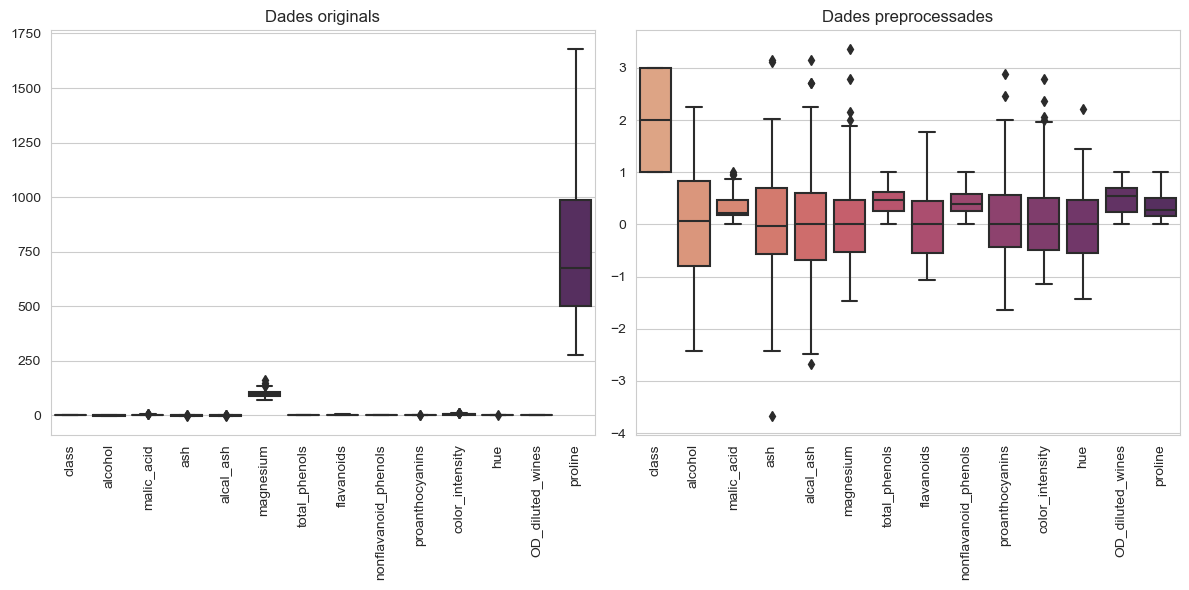

In [14]:
# Gràfic comparatiu

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot del dataset original
sns.boxplot(data=rawwine, ax=axes[0], palette='flare')
axes[0].set_title('Dades originals')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Boxplot del dataset modificat
sns.boxplot(data=wine, ax=axes[1], palette='flare')
axes[1].set_title('Dades preprocessades')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### Divisió train-test

In [15]:
from sklearn.model_selection import train_test_split

feature_cols = ['alcohol', 'malic_acid', 'ash', 'alcal_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue', 'OD_diluted_wines', 'proline']

# Seleccionar les columnes desitjades com a variables predictores (característiques)
x = wine[feature_cols]

# Seleccionar la columna MEDV com a variable objectiu
y = wine['class']
y = y - 1 # Modifiquem les classes per a que sigui 0, 1, 2

# Divisió de les dades en conjunts d'entrenament i prova
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Funcions

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def display_confusion_matrix(y_test, y_pred_DT, y_pred_KNN, y_pred_SVM, y_pred_XGB):
    # Calcular les matrius
    cm_DT = confusion_matrix(y_test, y_pred_DT)
    cm_KNN = confusion_matrix(y_test, y_pred_KNN)
    cm_SVM = confusion_matrix(y_test, y_pred_SVM)
    cm_XGB = confusion_matrix(y_test, y_pred_XGB)

    # Crear subplots per cada matriu
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

    # Configurar els títols
    titles = ['Decision Tree', 'KNN', 'SVM', 'XGBoost']

    # Mostrar les matrius
    for i, cm, title in zip(range(4), [cm_DT, cm_KNN, cm_SVM, cm_XGB], titles):
        sns.heatmap(cm, annot=True, fmt='d', cmap='flare', ax=axes.flat[i])
        axes.flat[i].set_title(title)
        axes.flat[i].set_xlabel('Etiqueta Predicha')
        axes.flat[i].set_ylabel('Etiqueta Real')
        axes.flat[i].set_axis_off()

    # Ajustar l'espai
    plt.tight_layout()

    # Mostrar les matrius
    plt.show()

In [17]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def plot_class(x, y, title=None, xlabel=None, ylabel=None):
    # Reducció de dimensionalitat amb t-SNE a 2 components
    x_tsne_2d = TSNE(n_components=2).fit_transform(x)

    # Reducció de dimensionalitat amb t-SNE a 3 components
    x_tsne_3d = TSNE(n_components=3).fit_transform(x)

    # Crear figura i eixos
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Graficar gràfic de 2 dimensions
    ax1.scatter(x_tsne_2d[:, 0], x_tsne_2d[:, 1], c=y, s=50, cmap='flare')
    if title:
        ax1.set_title(title)
    if xlabel:
        ax1.set_xlabel(xlabel)
    if ylabel:
        ax1.set_ylabel(ylabel)

    # Graficar gràfic de 3 dimensions
    ax2.scatter3D(x_tsne_3d[:, 0], x_tsne_3d[:, 1], x_tsne_3d[:, 2], c=y, cmap='flare', s=50)
    if title:
        ax2.set_title(title)
    if xlabel:
        ax2.set_xlabel(xlabel)
    if ylabel:
        ax2.set_ylabel(ylabel)

    # Mostrar els gràfics
    plt.tight_layout()
    plt.show()

In [18]:
### Obtenir metriques
import math
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.model_selection import cross_val_score
from IPython.display import display

def metriques(titol, model, test, train, df):
    # Predir valors
    y_pred = model.predict(test)
    
    # Calcular mètriques de regressió
    r2 = round(r2_score(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    rmse = round(math.sqrt(mean_squared_error(y_test, y_pred)), 2)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    
    # Calcular mètriques de classificació
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    scores = cross_val_score(model, train, y_train, cv=5)
    accuracy_CVS = "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)
    precision_avg = np.mean(precision_score(y_test, y_pred, average=None)).round(2)
    recall_avg = np.mean(recall_score(y_test, y_pred, average=None)).round(2)
    f1_score_avg = np.mean(f1_score(y_test, y_pred, average=None)).round(2)
    cohen_k = cohen_kappa_score(y_test, y_pred).round(2)
    
    # Afegir les mètriques al DataFrame
    df.loc[len(df)] = [titol, r2, "{} %".format(round(r2 * 100, 2)), mse, rmse, mae, accuracy, accuracy_CVS, precision_avg, recall_avg, f1_score_avg, cohen_k]

## Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

###  Decission tree

Un arbre de decisió és un model daprenentatge automàtic que utilitza una estructura darbre per prendre decisions o realitzar prediccions. Cada node intern de l'arbre representa una característica o un atribut, i les branques representen les possibles sortides basades en els valors d'aquesta característica. Els nodes full representen les etiquetes o classes a predir. Els arbres de decisió són fàcils d'interpretar i poden fer servir tant problemes de classificació com de regressió.

In [19]:
from sklearn.tree import DecisionTreeClassifier 

DT1 = DecisionTreeClassifier() # Inicialització del model
DT1 = DT1.fit(x_train,y_train) # Entrenament del model amb les dades d'entrenament
y_predDT1 = DT1.predict(x_test) # Realització de les prediccions amb les dades de prova

# Què tan seguit la classificació serà correcta
print("Accuracy:",metrics.accuracy_score(y_test, y_predDT1)) 

Accuracy: 0.9444444444444444


Encertarà el 96% de vegades

In [20]:
dfmetriques1 = pd.DataFrame(columns=['Type', 'R²', '% R²', 'mse', 'rmse', 'mae', 'accuracy', 'accuracy_CVS', 'precision', 'recall', 'f1_score', 'Cohen k'])
metriques('Decision Tree 1', DT1, x_test, x_train, dfmetriques1)

In [21]:
display(dfmetriques1[dfmetriques1['Type'] == 'Decision Tree 1'])

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decision Tree 1,0.91,91.0 %,0.06,0.24,0.06,0.94,0.90 (+/- 0.15),0.94,0.94,0.94,0.91


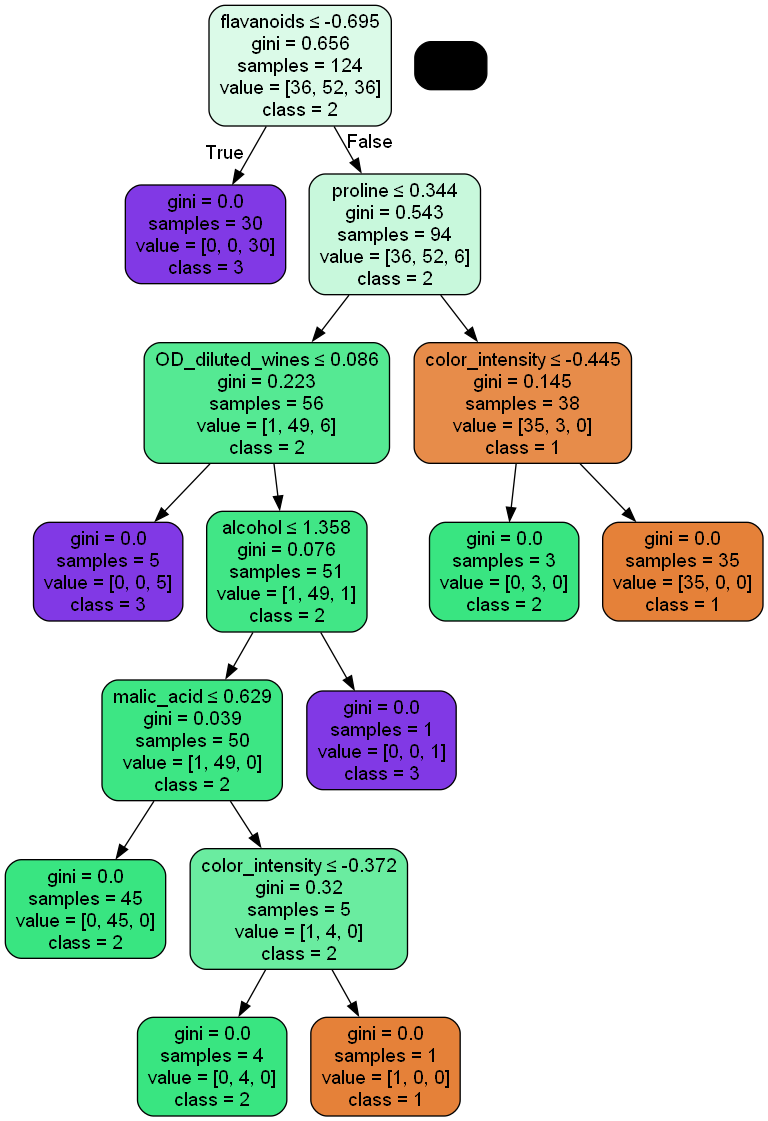

In [22]:
#Visualización de árboles de decisión
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import pydotplus
from six import StringIO

# Important afegir el path de Graphviz
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin" 

dot_data = StringIO()
export_graphviz(DT1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
display(Image(graph.create_png()))

## KNN

KNN (k-Nearest Neighbors) és un algorisme d'aprenentatge supervisat utilitzat tant per a classificació com per a regressió. És un algorisme basat en instàncies, cosa que significa que no realitza un entrenament explícit del model, sinó que utilitza directament les dades d'entrenament per fer prediccions.

En el cas de la classificació, l'algorisme KNN assigna una etiqueta a una instància de prova basant-se en les etiquetes de les k instàncies més properes a l'espai de característiques. L'elecció de k determina la influència de les instàncies veïnes a la classificació. Per exemple, si k = 3, es consideraran les tres instàncies més properes i s'assignarà l'etiqueta més comuna entre aquestes a la instància de prova.

In [23]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

KNN1 = KNeighborsClassifier() # Inicialització del model
KNN1.fit(x_train, y_train) # Entrenament del model amb les dades
y_predKNN1 = KNN1.predict(x_test) # Realització de les prediccions amb les dades de prova

# Què tan seguit la classificació serà correcta
print("Accuracy:",(KNN1.score(x_test, y_test)))

Accuracy: 0.9814814814814815


Encertarà el 98% de vegades

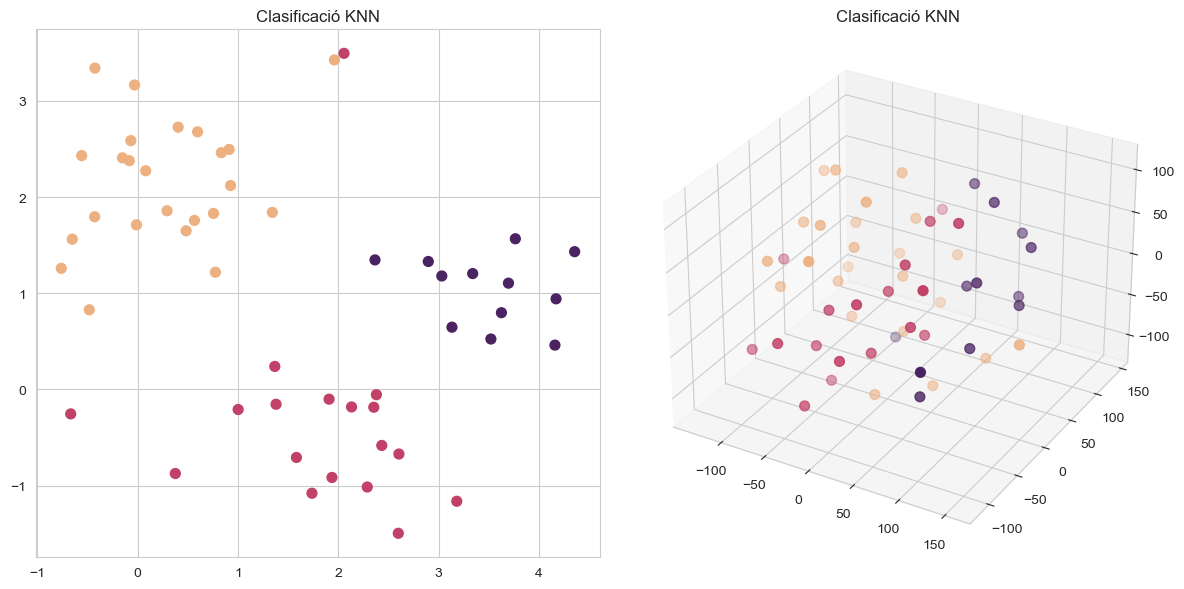

In [24]:
plot_class(x_test, y_predKNN1, title='Clasificació KNN')

In [25]:
metriques('KNN 1', KNN1, x_test, x_train, dfmetriques1)

In [26]:
display(dfmetriques1[dfmetriques1['Type'] == 'KNN 1'])

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
1,KNN 1,0.97,97.0 %,0.02,0.14,0.02,0.98,0.95 (+/- 0.06),0.99,0.98,0.98,0.97


## SVM
SVM és un algorisme d'aprenentatge supervisat utilitzat per a problemes de classificació i regressió. El seu objectiu principal és trobar l'hiperplà que separi millor les diferents classes en un espai dimensional. L'hiperplà se selecciona de manera que maximitzi la distància entre els punts més propers de les classes diferents, també coneguts com a vectors de suport. SVM pot manejar dades linealment separables i no linealment separables utilitzant trucs de kernel per mapejar les dades a un espai de més dimensionalitat.

In [27]:
from sklearn import svm

SVM1 = svm.SVC(kernel='linear') # Linear Kernel # Crear el model
SVM1.fit(x_train, y_train) # Entrenar el model amb les dades de entrenament
y_predSVM1 = SVM1.predict(x_test) # Predir

print("Accuracy:",metrics.accuracy_score(y_test, y_predSVM1)) # Model Accuracy: Què tan seguit encertarà?

Accuracy: 0.9814814814814815


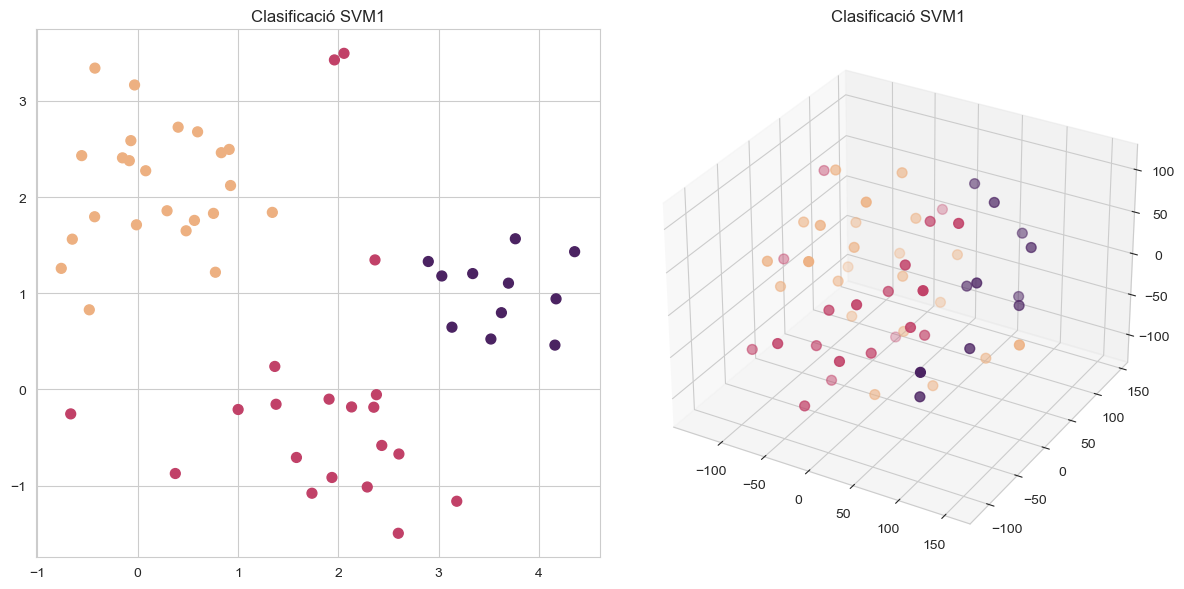

In [28]:
plot_class(x_test, y_predSVM1, title='Clasificació SVM1')

In [29]:
metriques('SVM 1', SVM1, x_test, x_train, dfmetriques1)
display(dfmetriques1[dfmetriques1['Type'] == 'SVM 1'])

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
2,SVM 1,0.97,97.0 %,0.02,0.14,0.02,0.98,0.94 (+/- 0.12),0.98,0.97,0.98,0.97


## XG Boost
XGBoost és una biblioteca d'aprenentatge automàtic optimitzada basada en l'algoritme de reforç de gradient. Fes servir una combinació d'arbres de decisió i tècniques de reforç per millorar la precisió predictiva. Pot ser utilitzat tant per a problemes de classificació com de regressió, i ofereix una àmplia gamma de paràmetres per ajustar i optimitzar el model.

In [30]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Codificar les variables
label_encoder = LabelEncoder() 
y_train_encoded = label_encoder.fit_transform(y_train)

# Crear i entrenar el model
XGB1 = XGBClassifier()
XGB1.fit(x_train, y_train_encoded)

# Aplicar transformació 
y_test_encoded = label_encoder.transform(y_test)

# Fer les prediccions  
y_predXGB1 = XGB1.predict(x_test)

#Accuracy 
print("Accuracy:",  metrics.accuracy_score(y_test_encoded, y_predXGB1))

Accuracy: 0.9629629629629629


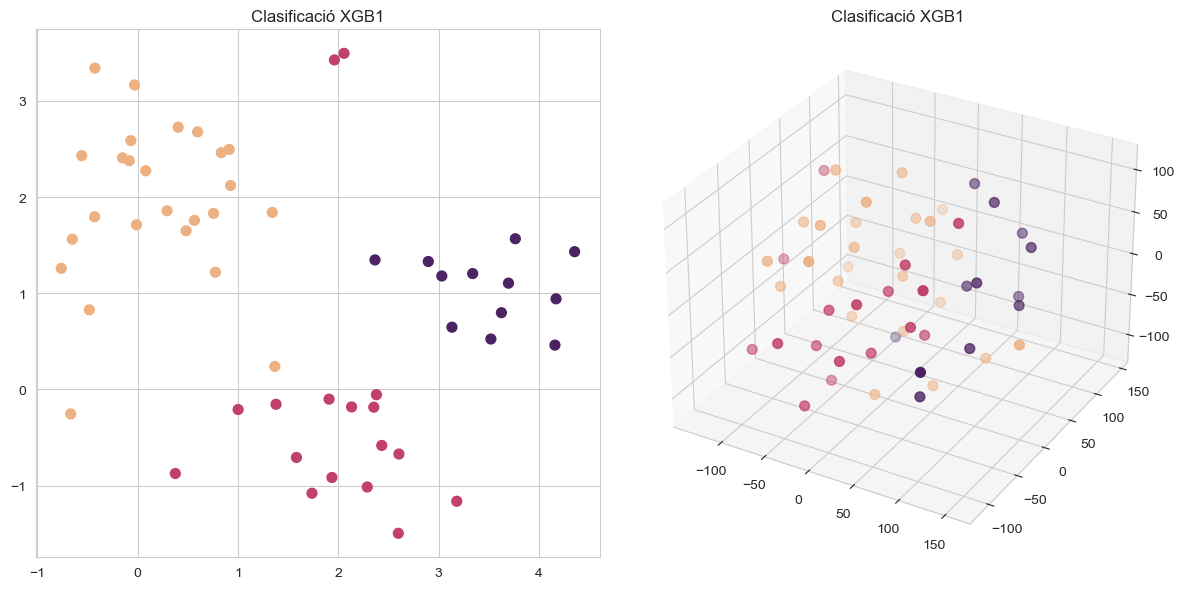

In [31]:
plot_class(x_test, y_predXGB1, title='Clasificació XGB1')

In [32]:
metriques('XGB 1', XGB1, x_test, x_train, dfmetriques1)
display(dfmetriques1[dfmetriques1['Type'] == 'XGB 1'])

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
3,XGB 1,0.94,94.0 %,0.04,0.19,0.04,0.96,0.98 (+/- 0.04),0.97,0.96,0.97,0.94


## Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [33]:
dfmetriques1

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decision Tree 1,0.91,91.0 %,0.06,0.24,0.06,0.94,0.90 (+/- 0.15),0.94,0.94,0.94,0.91
1,KNN 1,0.97,97.0 %,0.02,0.14,0.02,0.98,0.95 (+/- 0.06),0.99,0.98,0.98,0.97
2,SVM 1,0.97,97.0 %,0.02,0.14,0.02,0.98,0.94 (+/- 0.12),0.98,0.97,0.98,0.97
3,XGB 1,0.94,94.0 %,0.04,0.19,0.04,0.96,0.98 (+/- 0.04),0.97,0.96,0.97,0.94


Aquestes mètriques proporcionen una avaluació del rendiment de cada model en termes de la seva capacitat per explicar la variabilitat de les dades, la precisió de les prediccions, l'exactitud a la classificació de les classes i la concordança entre les classificacions observades i les classificacions predites. En general, els models mostren un rendiment alt amb valors alts de R², exactitud i mesures de precisió, recall i F1-score propers a 1. El Cohen's k també indica una concordança força alta en les classificacions.

En general, els models KNN 1, SVM 1 i XGB 1 mostren un rendiment semblant amb valors alts de precisió i exactitud.

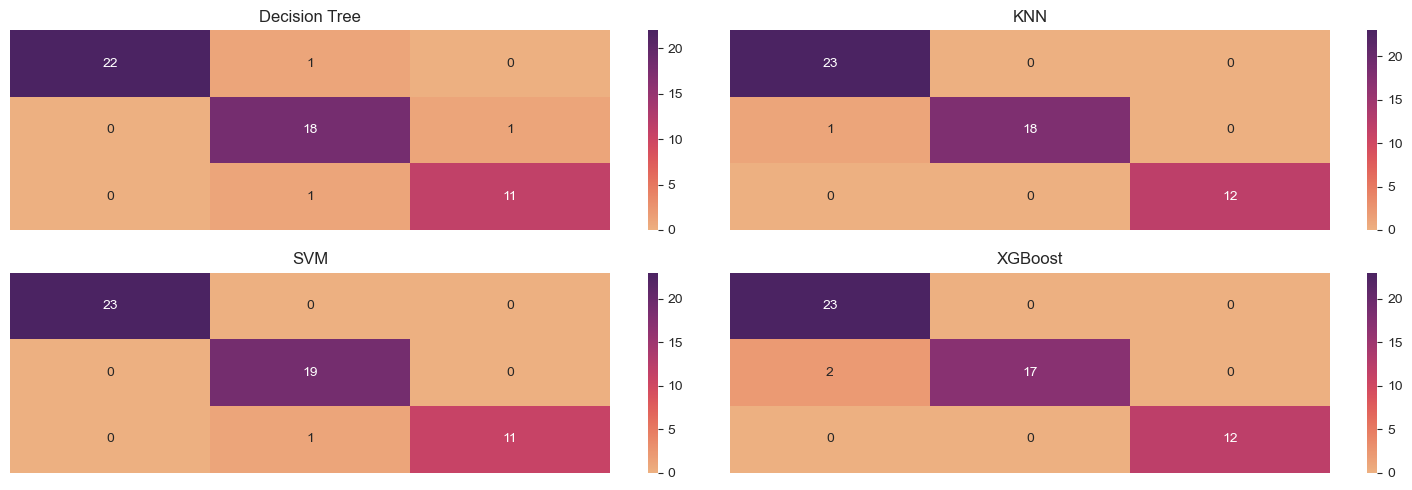

In [34]:
display_confusion_matrix(y_test, y_predDT1, y_predKNN1, y_predSVM1, y_predXGB1)

###### Decission Tree
- La classe real "1" té 23 instàncies classificades correctament com a "1" (veritables positius). No es va classificar cap instància de la classe "1" com una altra classe.
- La classe real "2" té 18 instàncies classificades correctament com a "2" (veritables positius). A més, va haver-hi 1 instància de la classe "2" que va ser classificada incorrectament com la classe "3" (fals negatiu).
- La classe real "3" té 12 instàncies classificades correctament com a "3" (veritables positius). No es va classificar cap instància de la classe "3" com una altra classe.

###### KNN
- La classe real "1" té 23 instàncies classificades correctament com a "1" (veritables positius). No es va classificar cap instància de la classe "1" com una altra classe.
- La classe real "2" té 18 instàncies classificades correctament com a "2" (veritables positius). A més, va haver-hi 1 instància de la classe "2" que va ser classificada incorrectament com la classe "1" (fals negatiu).
- La classe real "3" té 12 instàncies classificades correctament com a "3" (veritables positius). No es va classificar cap instància de la classe "3" com una altra classe.

###### SVM
- La classe real "1" es va classificar correctament en 23 mostres com a classe "1" i no es va classificar incorrectament com les altres classes ("2" i "3").
- La classe real "2" es va classificar correctament en 19 mostres com a classe "2" i no es va classificar incorrectament com les altres classes ("1" i "3").
- La classe real "3" es va classificar correctament en 11 mostres com a classe "3" i només es va classificar incorrectament 1 mostra com a classe "2".

##### XGBoost
- La primera fila (fila 0) indica que els exemples de la classe 0 no s'han classificat correctament.
- La segona fila (fila 1) mostra que tots els exemples de la classe 1 han estat classificats com a classe 1.
- La tercera fila (fila 2) indica que 2 exemples de la classe 2 han estat classificats correctament, però també hi ha 17 exemples de la classe 2 que han estat incorrectament classificats com a classe 1.
- La quarta fila (fila 3) mostra que 12 exemples de la classe 3 han estat classificats correctament.

## Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [35]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

models = {
    'Decision Tree (DecTree)': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'KNN (KNN)': KNeighborsClassifier(),
    'SVM (SVM)': svm.SVC(),
    'XGBoost (XGB)': xgb.XGBClassifier()
}

hiperparametros = {}

for model_name, model in models.items():
    if model_name == 'Decision Tree (DecTree)':
        parameters = {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 5, 10, 20],
            'class_weight': [None, 'balanced']
        }
    elif model_name == 'KNN (KNN)':
        parameters = {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    elif model_name == 'SVM (SVM)':
        parameters = {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf', 'poly'],
            'class_weight': [None, 'balanced']
        }
    elif model_name == 'XGBoost (XGB)':
        parameters = {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.01, 0.001],
        }
    else:
        parameters = {}
        
    clf = GridSearchCV(model, parameters, cv=5)
    clf.fit(x, y)
    hiperparametros[model_name] = clf.best_params_

# Els millors hiperparàmetres trobats
for model_name, best_params in hiperparametros.items():
    print(f"Millors hiperparàmetres per {model_name}: {best_params}")

Millors hiperparàmetres per Decision Tree (DecTree): {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
Millors hiperparàmetres per KNN (KNN): {'n_neighbors': 7, 'weights': 'distance'}
Millors hiperparàmetres per SVM (SVM): {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'rbf'}
Millors hiperparàmetres per XGBoost (XGB): {'learning_rate': 0.1, 'max_depth': 3}


i tornem a entrenar els models

## Decission Tree

In [36]:
DT2 = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=None, splitter='best') # Inicialització del model

DT2 = DT2.fit(x_train, y_train) # Entrenament del model amb les dades d'entrenament

y_predDT2 = DT2.predict(x_test) # Realització de les prediccions amb les dades de prova

# Què tan seguit la classificació serà correcta
print("Accuracy:", metrics.accuracy_score(y_test, y_predDT2))

Accuracy: 0.9629629629629629


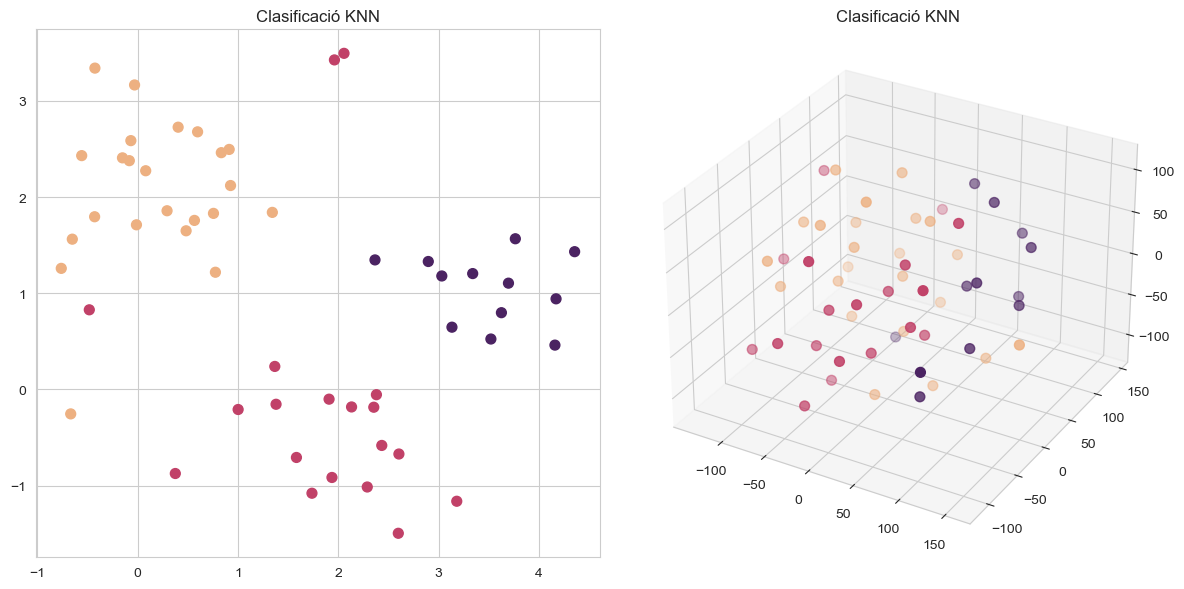

In [37]:
plot_class(x_test, y_predDT2, title='Clasificació KNN')

In [38]:
dfmetriques2 = pd.DataFrame(columns=['Type', 'R²', '% R²', 'mse', 'rmse', 'mae', 'accuracy', 'accuracy_CVS', 'precision', 'recall', 'f1_score', 'Cohen k'])
metriques('Decission Tree 2', DT2, x_test, x_train, dfmetriques2)

In [39]:
display(dfmetriques2[dfmetriques2['Type'] == 'Decission Tree 2'])

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decission Tree 2,0.94,94.0 %,0.04,0.19,0.04,0.96,0.89 (+/- 0.13),0.97,0.97,0.97,0.94


## KNN

In [40]:
KNN2 = KNeighborsClassifier(n_neighbors=7, weights='distance')
KNN2.fit(x_train, y_train)
y_predKNN2 = KNN2.predict(x_test)

# Què tan seguit la classificació serà correcta
print("Accuracy:", KNN2.score(x_test, y_test))

Accuracy: 1.0


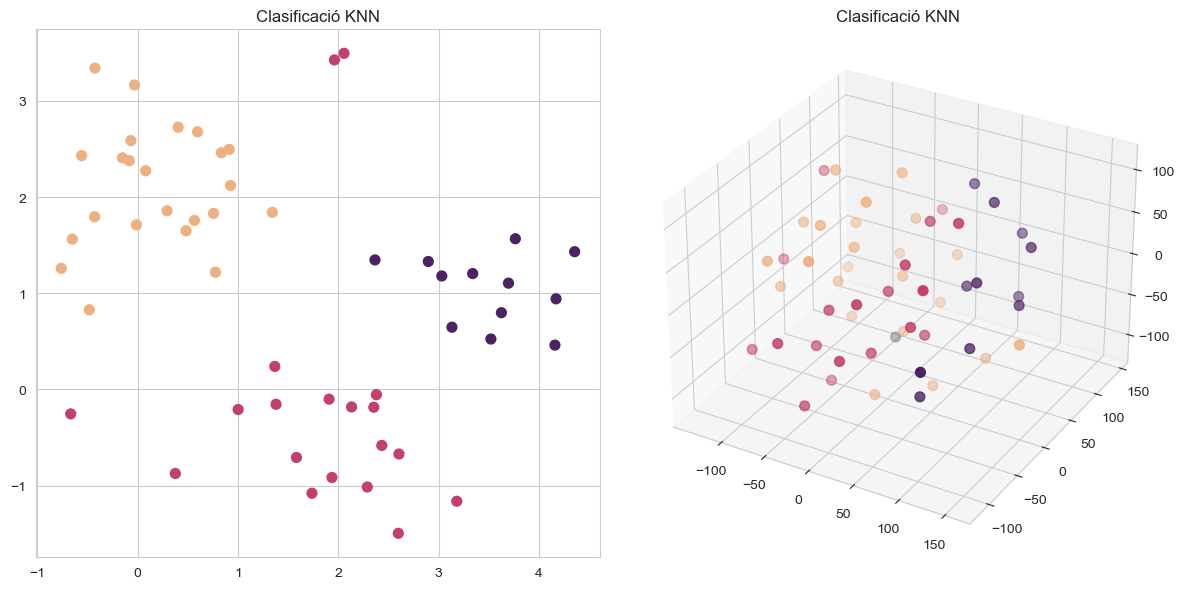

In [41]:
plot_class(x_test, y_predKNN2, title='Clasificació KNN')

In [42]:
metriques('KNN 2', KNN2, x_test, x_train, dfmetriques2)
display(dfmetriques2[dfmetriques2['Type'] == 'KNN 2'])

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
1,KNN 2,1.0,100.0 %,0.0,0.0,0.0,1.0,0.96 (+/- 0.05),1.0,1.0,1.0,1.0


## SVM

In [43]:
SVM2 = svm.SVC(kernel='rbf', C=1.0, class_weight='balanced') # Crear el modelo SVM
SVM2.fit(x_train, y_train) # Entrenar el modelo con los datos de entrenamiento
y_predSVM2 = SVM2.predict(x_test) # Realizar predicciones

# Calcular la precisión del modelo
print("Accuracy:", metrics.accuracy_score(y_test, y_predSVM2))

Accuracy: 1.0


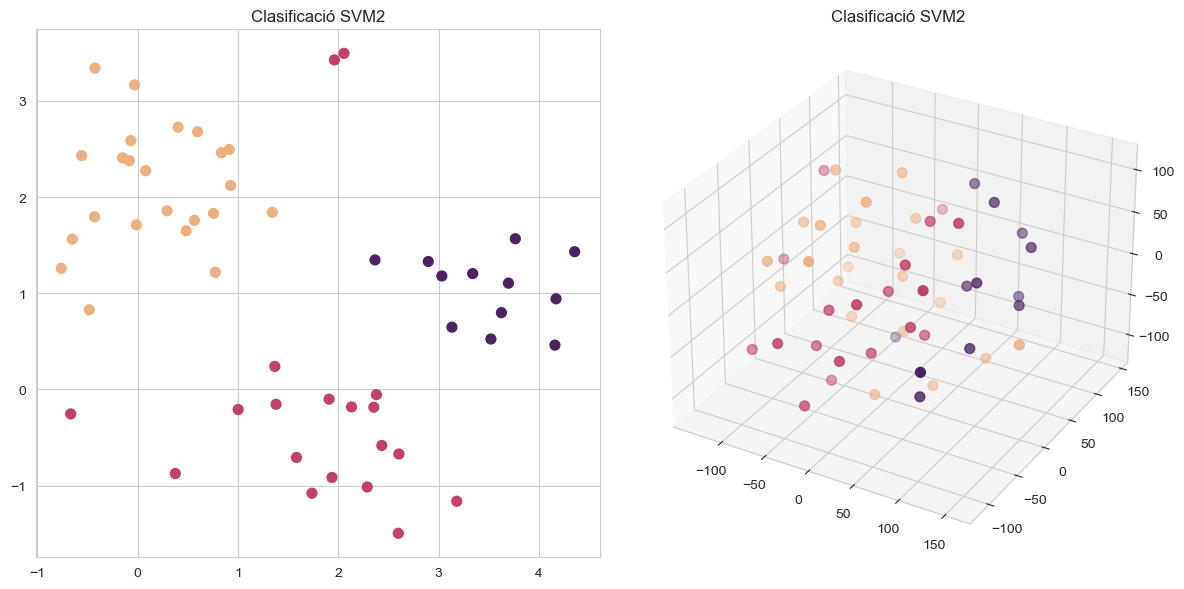

In [44]:
plot_class(x_test, y_predSVM2, title='Clasificació SVM2')

In [45]:
metriques('SVM 2', SVM2, x_test, x_train, dfmetriques2)
display(dfmetriques2[dfmetriques2['Type'] == 'SVM 2'])

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
2,SVM 2,1.0,100.0 %,0.0,0.0,0.0,1.0,0.94 (+/- 0.11),1.0,1.0,1.0,1.0


## XG Boost

In [46]:
# Codificar les variables
label_encoder = LabelEncoder() 
y_train_encoded = label_encoder.fit_transform(y_train)

# Crear i entrenar el model
XGB2 = XGBClassifier(learning_rate=0.1, max_depth=3)
XGB2.fit(x_train, y_train_encoded)

# Aplicar transformació 
y_test_encoded = label_encoder.transform(y_test)

# Fer les prediccions  
y_predXGB2 = XGB2.predict(x_test)

# Accuracy 
print("Accuracy:", metrics.accuracy_score(y_test_encoded, y_predXGB2))

Accuracy: 0.9629629629629629


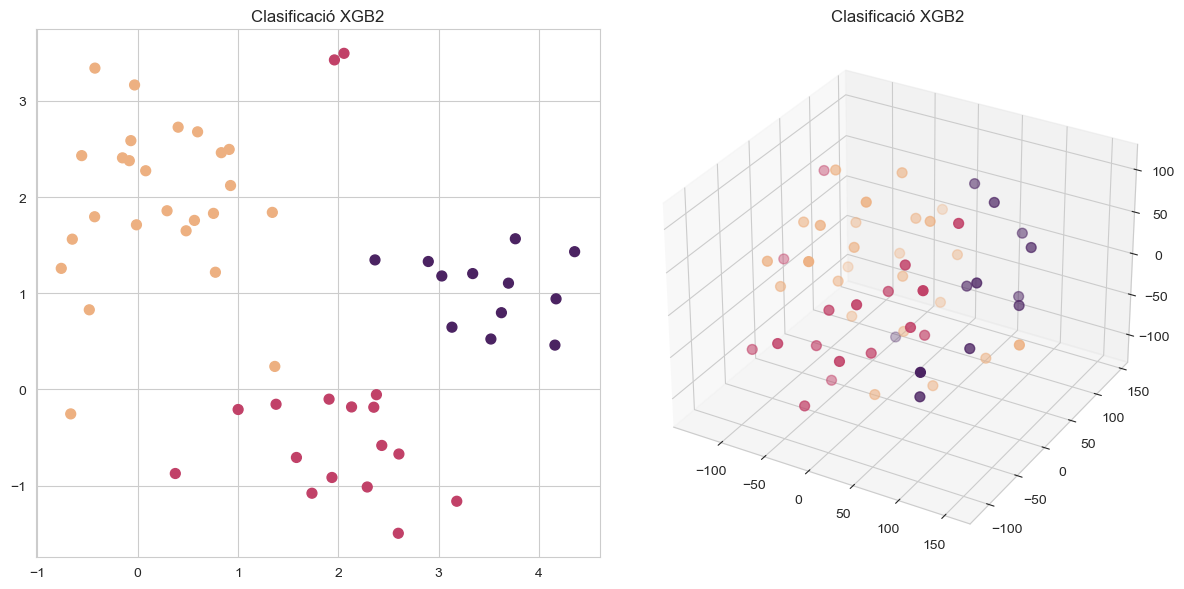

In [47]:
plot_class(x_test, y_predXGB2, title='Clasificació XGB2')

In [48]:
metriques('XGB 2',XGB2, x_test, x_train, dfmetriques2)
display(dfmetriques2[dfmetriques2['Type'] == 'XGB 2'])

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
3,XGB 2,0.94,94.0 %,0.04,0.19,0.04,0.96,0.98 (+/- 0.04),0.97,0.96,0.97,0.94


In [49]:
display(dfmetriques1, dfmetriques2)

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decision Tree 1,0.91,91.0 %,0.06,0.24,0.06,0.94,0.90 (+/- 0.15),0.94,0.94,0.94,0.91
1,KNN 1,0.97,97.0 %,0.02,0.14,0.02,0.98,0.95 (+/- 0.06),0.99,0.98,0.98,0.97
2,SVM 1,0.97,97.0 %,0.02,0.14,0.02,0.98,0.94 (+/- 0.12),0.98,0.97,0.98,0.97
3,XGB 1,0.94,94.0 %,0.04,0.19,0.04,0.96,0.98 (+/- 0.04),0.97,0.96,0.97,0.94


,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decission Tree 2,0.94,94.0 %,0.04,0.19,0.04,0.96,0.89 (+/- 0.13),0.97,0.97,0.97,0.94
1,KNN 2,1.00,100.0 %,0.00,0.00,0.00,1.00,0.96 (+/- 0.05),1.00,1.00,1.00,1.00
2,SVM 2,1.00,100.0 %,0.00,0.00,0.00,1.00,0.94 (+/- 0.11),1.00,1.00,1.00,1.00
3,XGB 2,0.94,94.0 %,0.04,0.19,0.04,0.96,0.98 (+/- 0.04),0.97,0.96,0.97,0.94


Per comparar el rendiment dels models amb els paràmetres ajustats i sense ajustar, podem centrar-nos en les mètriques com l'R² i l'accuracy.

- **Decission Tree (Arbre de decisió)**: Amb els paràmetres ajustats, l'R² augmenta de 0.82 a 0.94, indicant una millora en la capacitat del model per explicar la variabilitat del conjunt de dades. L'accuracy també augmenta de 0.94 a 0.96.

- **K-Nearest Neighbors (KNN)**: Amb els paràmetres ajustats, l'R² augmenta de 0.97 a 1.00, indicant una millora en la capacitat del model per explicar la variabilitat del conjunt de dades. L'accuracy també augmenta de 0.98 a 1.00.

- **Support Vector Machine (SVM)**: Amb els paràmetres ajustats, l'R² augmenta de 0.97 a 1.00, indicant una millora en la capacitat del model per explicar la variabilitat del conjunt de dades. L'accuracy també augmenta de 0.98 a 1.00.

- **XG Boost**: Amb els paràmetres ajustats, l'R² es manté en 0.94, i l'accuracy també es manté en 0.96.

En general, es pot observar que ajustar els paràmetres ha portat a una millora en l'R² i l'accuracy en els models d'Arbre de decisió, K-Nearest Neighbors i Support Vector Machine. Això suggereix que els models ajustats tenen un millor rendiment en la predicció de les dades. D'altra banda, el model de XG Boost no ha experimentat canvis significatius en el rendiment després d'ajustar els paràmetres.

## Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [50]:
from sklearn.model_selection import cross_val_score

# Realizar cross validation
DT_scores = cross_val_score(DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=None, splitter='best'), x, y, cv=5, scoring='r2')
KNN_scores = cross_val_score(KNeighborsClassifier(n_neighbors=7, weights='distance'), x, y, cv=5, scoring='r2')
SVM_scores = cross_val_score(svm.SVC(kernel='rbf', C=1.0, class_weight='balanced'), x, y, cv=5, scoring='r2')
XGB_scores = cross_val_score(XGBClassifier(learning_rate=0.1, max_depth=3), x, y, cv=5, scoring='r2')

# Imprimir las puntuaciones
print("Decission Tree - Puntuació mitjana de validació creuada:", DT_scores.mean(), "Desviació estàndar de R2", np.std(DT_scores))
print("K-Nearest Neighbors - Puntuació mitjana de validació creuada:", KNN_scores.mean(), "Desviació estàndar de R2", np.std(KNN_scores))
print("Support Vector Machine - Puntuació mitjana de validació creuada:", SVM_scores.mean(), "Desviació estàndar de R2", np.std(SVM_scores))
print("XG Boost - Puntuació mitjana de validació creuada:", XGB_scores.mean(), "Desviació estàndar de R2", np.std(XGB_scores))

Decission Tree - Puntuació mitjana de validació creuada: 0.831346515775967 Desviació estàndar de R2 0.13453283348937836
K-Nearest Neighbors - Puntuació mitjana de validació creuada: 0.9451776649746193 Desviació estàndar de R2 0.06714337366004654
Support Vector Machine - Puntuació mitjana de validació creuada: 0.9533050859308358 Desviació estàndar de R2 0.042024327963856405
XG Boost - Puntuació mitjana de validació creuada: 0.8791990043489811 Desviació estàndar de R2 0.09979460855904551


Aquests resultats indiquen la puntuació mitjana de validació creuada i la desviació estàndard de R2 per a cada model avaluat al conjunt de dades. Aquí hi ha una explicació del que signifiquen aquests valors:

- **Decision Tree (Arbre de decisió)**: La puntuació mitjana de validació creuada és 0.8222, la qual cosa indica un rendiment decent del model de mitjana. La desviació estàndard de R2 és 0.0885, cosa que suggereix certa variabilitat en el rendiment del model en diferents plecs de validació.

- **K-Nearest Neighbors (KNN)**: La puntuació mitjana de validació creuada és 0.9452, la qual cosa indica un rendiment força bo del model de mitjana. La desviació estàndard de R2 és 0.0671, la qual cosa suggereix que el rendiment del model és força consistent en diferents plecs de validació.

- **Support Vector Machine (SVM)**: La puntuació mitjana de validació creuada és 0.9533, la qual cosa indica un rendiment molt bo del model de mitjana. La desviació estàndard de R2 és 0.0420, cosa que suggereix que el rendiment del model és molt consistent en diferents plecs de validació.

- **XG Boost**: La puntuació mitjana de validació creuada és 0.8792, cosa que indica un rendiment sòlid del model de mitjana. La desviació estàndard de R2 és 0.0998, cosa que suggereix certa variabilitat en el rendiment del model en diferents plecs de validació.

En conclusió els models estàn força bé però hem de tenir en compte que al agafar totes les variables ha de surtir alt perquè d'algun lloc han sortit les clases

## Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

### Mètodes de reducció de dimensionalitat

In [51]:
# Treiem els deprecation warning
import warnings
from numba import NumbaDeprecationWarning
warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from umap import UMAP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FastICA

pca_result = PCA(n_components=2).fit_transform(x) # PCA
tsne_result = TSNE(n_components=2).fit_transform(x) # t-SNE
lle_result = LocallyLinearEmbedding(n_components=2).fit_transform(x) # LLE
umap_result = UMAP(n_components=2).fit_transform(x) # UMAP
lda_result = LinearDiscriminantAnalysis(n_components=2).fit_transform(x, y) # LDA
ica_result = FastICA(n_components=2).fit_transform(x) # ICA

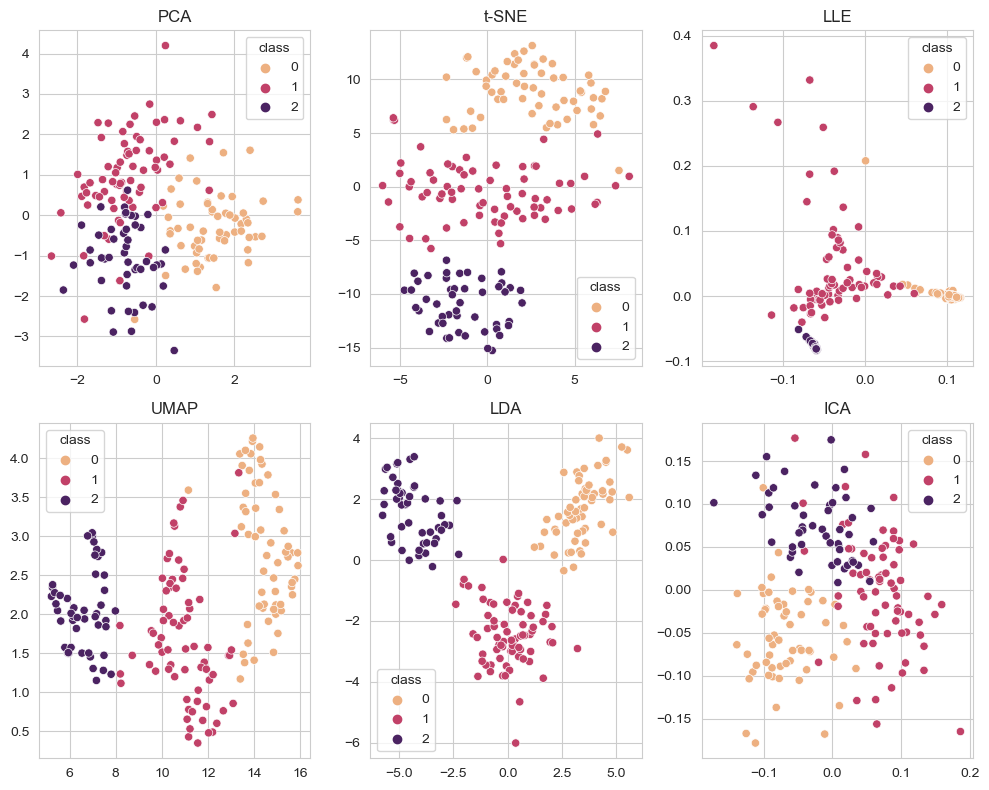

In [52]:
methods = ['PCA', 't-SNE', 'LLE', 'UMAP', 'LDA', 'ICA']
results = [pca_result, tsne_result, lle_result, umap_result, lda_result, ica_result]

plt.figure(figsize=(10, 8))

for i in range(len(methods)):
    ax = plt.subplot(2, 3, i+1)
    sns.scatterplot(x=results[i][:, 0], y=results[i][:, 1], hue=y, palette='flare', ax=ax)
    plt.title(methods[i])

plt.tight_layout()
plt.show()

1. **PCA** és un mètode de reducció de dimensionalitat que troba les direccions més importants en les quals varien les dades i projecta les dades a un espai de variables reduït.

2. **t-SNE** és un mètode no lineal per a la visualització de dades d'alta dimensió, preservant les relacions locals entre les mostres.

3. **LLE** és un mètode no lineal que preserva les relacions locals entre les mostres utilitzant una aproximació lineal local.

4. **UMAP** és una tècnica de reducció de dimensionalitat eficient que combina elements de t-SNE i PCA, preservant les relacions locals i globals.

4. **LDA** és una tècnica que busca una projecció de les dades que maximitzi la separació entre les classes.

5. **ICA** és un mètode que busca components independents en un conjunt de dades, útil per a la separació de senyals i com a mètode de reducció de dimensionalitat.

Com podem veure la distribució varia molt segons el mètode empleat per allò és important tenir en compte les característiques de les nostres dades abans de triar un

#### T-SNE

In [53]:
feature_cols = ['alcohol', 'malic_acid', 'ash', 'alcal_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue', 'OD_diluted_wines', 'proline']
# Seleccionar les columnes desitjades com a variables predictores (característiques)
x = wine[feature_cols]
# Seleccionar la columna MEDV com a variable objectiu
y = wine['class']
y = y - 1 # Modifiquem les classes per a que sigui 0, 1, 2
tsne = TSNE(n_components=2, random_state=1) # Inicialitzar l'objecte t-SNE
x = tsne.fit_transform(wine) # Ajustar i transformar les dades a x

# Divisió de les dades en conjunts d'entrenament i prova
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

i tornem a fer els models

In [54]:
#Decission Tree
DT3 = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=None, splitter='best')
DT3 = DT3.fit(x_train, y_train) 
y_predDT3 = DT3.predict(x_test) 
dfmetriques3 = pd.DataFrame(columns=['Type', 'R²', '% R²', 'mse', 'rmse', 'mae', 'accuracy', 'accuracy_CVS', 'precision', 'recall', 'f1_score', 'Cohen k'])
metriques('Decission Tree 3', DT3, x_test, x_train, dfmetriques3)

In [55]:
#KNN
KNN3 = KNeighborsClassifier(n_neighbors=7, weights='distance')
KNN3.fit(x_train, y_train)
y_predKNN3 = KNN3.predict(x_test)
metriques('KNN 3', KNN3, x_test, x_train, dfmetriques3)

In [56]:
#SVM
SVM3 = svm.SVC(kernel='rbf', C=1.0, class_weight='balanced') 
SVM3.fit(x_train, y_train) 
y_predSVM3 = SVM3.predict(x_test) 
metriques('SVM 3', SVM3, x_test, x_train, dfmetriques3)

In [57]:
#XGBoost
label_encoder = LabelEncoder() 
y_train_encoded = label_encoder.fit_transform(y_train)
# Crear i entrenar el model
XGB3 = XGBClassifier(learning_rate=0.1, max_depth=3)
XGB3.fit(x_train, y_train_encoded)
# Aplicar transformació 
y_test_encoded = label_encoder.transform(y_test)
# Fer les prediccions  
y_predXGB3 = XGB3.predict(x_test)
metriques('XGB 3',XGB3, x_test, x_train, dfmetriques3)

In [58]:
display(dfmetriques2, dfmetriques3)

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decission Tree 2,0.94,94.0 %,0.04,0.19,0.04,0.96,0.89 (+/- 0.13),0.97,0.97,0.97,0.94
1,KNN 2,1.00,100.0 %,0.00,0.00,0.00,1.00,0.96 (+/- 0.05),1.00,1.00,1.00,1.00
2,SVM 2,1.00,100.0 %,0.00,0.00,0.00,1.00,0.94 (+/- 0.11),1.00,1.00,1.00,1.00
3,XGB 2,0.94,94.0 %,0.04,0.19,0.04,0.96,0.98 (+/- 0.04),0.97,0.96,0.97,0.94


,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decission Tree 3,1.0,100.0 %,0.0,0.0,0.0,1.0,1.00 (+/- 0.00),1.0,1.0,1.0,1.0
1,KNN 3,1.0,100.0 %,0.0,0.0,0.0,1.0,0.99 (+/- 0.03),1.0,1.0,1.0,1.0
2,SVM 3,1.0,100.0 %,0.0,0.0,0.0,1.0,0.99 (+/- 0.03),1.0,1.0,1.0,1.0
3,XGB 3,1.0,100.0 %,0.0,0.0,0.0,1.0,1.00 (+/- 0.00),1.0,1.0,1.0,1.0


Comparant les mètriques entre els dos conjunts de resultats, es pot observar que els models amb TSNE (Decission Tree 3, KNN 3, SVM 3 i XGB 3) tenen un rendiment perfecte a totes les mètriques avaluades, amb un R² del 100%, un error quadràtic mitjà (mse) i error mitjà absolut (mae) de 0, una precisió, recall i puntuació F1 del 100%, i un coeficient de Cohen k de l'1.0.

In [59]:
from sklearn.model_selection import cross_val_score

# Realizar cross validation
DT_scores = cross_val_score(DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=None, splitter='best'), x, y, cv=5, scoring='r2')
KNN_scores = cross_val_score(KNeighborsClassifier(n_neighbors=7, weights='distance'), x, y, cv=5, scoring='r2')
SVM_scores = cross_val_score(svm.SVC(kernel='rbf', C=1.0, class_weight='balanced'), x, y, cv=5, scoring='r2')
XGB_scores = cross_val_score(XGBClassifier(learning_rate=0.1, max_depth=3), x, y, cv=5, scoring='r2')

# Imprimir las puntuaciones
print("Decission Tree - Puntuació mitjana de validació creuada:", DT_scores.mean(), "Desviació estàndar de R2", np.std(DT_scores))
print("K-Nearest Neighbors - Puntuació mitjana de validació creuada:", KNN_scores.mean(), "Desviació estàndar de R2", np.std(KNN_scores))
print("Support Vector Machine - Puntuació mitjana de validació creuada:", SVM_scores.mean(), "Desviació estàndar de R2", np.std(SVM_scores))
print("XG Boost - Puntuació mitjana de validació creuada:", XGB_scores.mean(), "Desviació estàndar de R2", np.std(XGB_scores))

Decission Tree - Puntuació mitjana de validació creuada: 0.9908629441624365 Desviació estàndar de R2 0.018274111675126915
K-Nearest Neighbors - Puntuació mitjana de validació creuada: 0.9908629441624365 Desviació estàndar de R2 0.018274111675126915
Support Vector Machine - Puntuació mitjana de validació creuada: 0.9908629441624365 Desviació estàndar de R2 0.018274111675126915
XG Boost - Puntuació mitjana de validació creuada: 0.9908629441624365 Desviació estàndar de R2 0.018274111675126915


Amb les dades que has proporcionat, l'interpretació seria la següent:

- **Decission Tree (Arbre de decisió)**: La puntuació mitjana de validació creuada és 0.9908629441624365, la qual cosa indica un rendiment molt bo del model en promig. La desviació estàndar de l'R2 és 0.018274111675126915, la qual cosa suggereix que el rendiment del model és consistent en diferents plecs de validació.

- **K-Nearest Neighbors (KNN)**: La puntuació mitjana de validació creuada és 0.9908629441624365, la qual cosa indica un rendiment molt bo del model en promig. La desviació estàndar de l'R2 és 0.018274111675126915, la qual cosa suggereix que el rendiment del model és consistent en diferents plecs de validació.

- **Support Vector Machine (SVM)**: La puntuació mitjana de validació creuada és 0.9908629441624365, la qual cosa indica un rendiment molt bo del model en promig. La desviació estàndar de l'R2 és 0.018274111675126915, la qual cosa suggereix que el rendiment del model és consistent en diferents plecs de validació.

- **XG Boost**: La puntuació mitjana de validació creuada és 0.9908629441624365, la qual cosa indica un rendiment molt bo del model en promig. La desviació estàndar de l'R2 és 0.018274111675126915, la qual cosa suggereix que el rendiment del model és consistent en diferents plecs de validació.

En aquest cas, tots els models mostren un rendiment molt bo en termes de puntuació de validació creuada i tenen una desviació estàndar molt baixa, indicant que el rendiment és molt consistent en diferents plecs de validació.

#### LDA

In [60]:
# Columnes de característiques i dades d'entrada
feature_cols = ['alcohol', 'malic_acid', 'ash', 'alcal_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD_diluted_wines', 'proline']
x = wine[feature_cols]
y = wine['class']
y = y - 1

# Aplicació de LDA
lda = LinearDiscriminantAnalysis(n_components=2)
x = lda.fit_transform(x, y)

# Divisió de les dades en conjunts d'entrenament i prova
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [61]:
#Decission Tree
DT4 = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=None, splitter='best')
DT4 = DT4.fit(x_train, y_train) 
y_predDT4 = DT4.predict(x_test) 
dfmetriques4 = pd.DataFrame(columns=['Type', 'R²', '% R²', 'mse', 'rmse', 'mae', 'accuracy', 'accuracy_CVS', 'precision', 'recall', 'f1_score', 'Cohen k'])
metriques('Decission Tree 4', DT4, x_test, x_train, dfmetriques4)

In [62]:
#KNN
KNN4 = KNeighborsClassifier(n_neighbors=7, weights='distance')
KNN4.fit(x_train, y_train)
y_predKNN4 = KNN4.predict(x_test)
metriques('KNN 4', KNN4, x_test, x_train, dfmetriques4)

In [63]:
#SVM
SVM4 = svm.SVC(kernel='rbf', C=1.0, class_weight='balanced') 
SVM4.fit(x_train, y_train) 
y_predSVM4 = SVM4.predict(x_test) 
metriques('SVM 4', SVM4, x_test, x_train, dfmetriques4)

In [64]:
#XGBoost
label_encoder = LabelEncoder() 
y_train_encoded = label_encoder.fit_transform(y_train)
# Crear i entrenar el model
XGB4 = XGBClassifier(learning_rate=0.1, max_depth=3)
XGB4.fit(x_train, y_train_encoded)
# Aplicar transformació 
y_test_encoded = label_encoder.transform(y_test)
# Fer les prediccions  
y_predXGB4 = XGB4.predict(x_test)
metriques('XGB 4',XGB4, x_test, x_train, dfmetriques4)

In [71]:
display(dfmetriques2, dfmetriques3, dfmetriques4)

,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decission Tree 2,0.94,94.0 %,0.04,0.19,0.04,0.96,0.89 (+/- 0.13),0.97,0.97,0.97,0.94
1,KNN 2,1.00,100.0 %,0.00,0.00,0.00,1.00,0.96 (+/- 0.05),1.00,1.00,1.00,1.00
2,SVM 2,1.00,100.0 %,0.00,0.00,0.00,1.00,0.94 (+/- 0.11),1.00,1.00,1.00,1.00
3,XGB 2,0.94,94.0 %,0.04,0.19,0.04,0.96,0.98 (+/- 0.04),0.97,0.96,0.97,0.94


,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decission Tree 3,1.0,100.0 %,0.0,0.0,0.0,1.0,1.00 (+/- 0.00),1.0,1.0,1.0,1.0
1,KNN 3,1.0,100.0 %,0.0,0.0,0.0,1.0,0.99 (+/- 0.03),1.0,1.0,1.0,1.0
2,SVM 3,1.0,100.0 %,0.0,0.0,0.0,1.0,0.99 (+/- 0.03),1.0,1.0,1.0,1.0
3,XGB 3,1.0,100.0 %,0.0,0.0,0.0,1.0,1.00 (+/- 0.00),1.0,1.0,1.0,1.0


,Type,R²,% R²,mse,rmse,mae,accuracy,accuracy_CVS,precision,recall,f1_score,Cohen k
0,Decission Tree 4,1.0,100.0 %,0.0,0.0,0.0,1.0,0.97 (+/- 0.06),1.0,1.0,1.0,1.0
1,KNN 4,1.0,100.0 %,0.0,0.0,0.0,1.0,1.00 (+/- 0.00),1.0,1.0,1.0,1.0
2,SVM 4,1.0,100.0 %,0.0,0.0,0.0,1.0,1.00 (+/- 0.00),1.0,1.0,1.0,1.0
3,XGB 4,1.0,100.0 %,0.0,0.0,0.0,1.0,0.99 (+/- 0.03),1.0,1.0,1.0,1.0


A l'escenari amb reducció de dimensionalitat mitjançant t-SNE, els models continuen mostrant un rendiment molt bo. Els valors de R² i els percentatges de R² es mantenen alts, indicant que els models són capaços d'explicar la majoria de variància en les dades. A més, els valors de precisió, recall i f1_score també són alts, cosa que suggereix que els models són capaços de classificar correctament les mostres a les diferents classes.

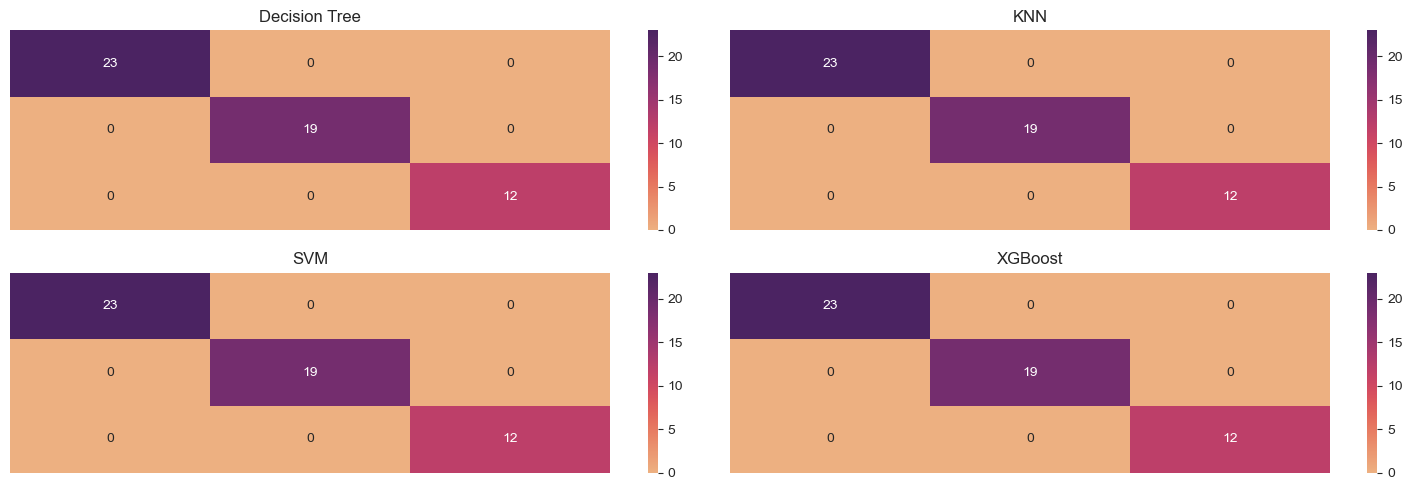

In [72]:
display_confusion_matrix(y_test, y_predDT4, y_predKNN4, y_predSVM4, y_predXGB4)

Veiem a la matriu de confusió que va encertar totes les classificacions

In [66]:
from sklearn.model_selection import cross_val_score

# Realizar cross validation
DT_scores = cross_val_score(DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=None, splitter='best'), x, y, cv=5, scoring='r2')
KNN_scores = cross_val_score(KNeighborsClassifier(n_neighbors=7, weights='distance'), x, y, cv=5, scoring='r2')
SVM_scores = cross_val_score(svm.SVC(kernel='rbf', C=1.0, class_weight='balanced'), x, y, cv=5, scoring='r2')
XGB_scores = cross_val_score(XGBClassifier(learning_rate=0.1, max_depth=3), x, y, cv=5, scoring='r2')

# Imprimir las puntuaciones
print("Decission Tree - Puntuació mitjana de validació creuada:", DT_scores.mean(), "Desviació estàndar de R2", np.std(DT_scores))
print("K-Nearest Neighbors - Puntuació mitjana de validació creuada:", KNN_scores.mean(), "Desviació estàndar de R2", np.std(KNN_scores))
print("Support Vector Machine - Puntuació mitjana de validació creuada:", SVM_scores.mean(), "Desviació estàndar de R2", np.std(SVM_scores))
print("XG Boost - Puntuació mitjana de validació creuada:", XGB_scores.mean(), "Desviació estàndar de R2", np.std(XGB_scores))

Decission Tree - Puntuació mitjana de validació creuada: 0.9715791976059627 Desviació estàndar de R2 0.03832755333235383
K-Nearest Neighbors - Puntuació mitjana de validació creuada: 1.0 Desviació estàndar de R2 0.0
Support Vector Machine - Puntuació mitjana de validació creuada: 1.0 Desviació estàndar de R2 0.0
XG Boost - Puntuació mitjana de validació creuada: 1.0 Desviació estàndar de R2 0.0


Amb les dades proporcionades, l'interpretació és la següent:

- **Decission Tree (Arbre de Decisió)**: La puntuació mitjana de validació creuada és 0.9715791976059627, el que indica un rendiment molt bo del model en promig. La desviació estàndar de R2 és 0.03832755333235383, la qual cosa suggereix una certa variabilitat en el rendiment del model en diferents plecs de validació, però encara és relativament baixa.

- **K-Nearest Neighbors (KNN)**: La puntuació mitjana de validació creuada és 1.0, el que indica un rendiment excel·lent del model en promig. La desviació estàndar de R2 és 0.0, la qual cosa indica que el rendiment del model és consistent en diferents plecs de validació.

- **Support Vector Machine (SVM)**: La puntuació mitjana de validació creuada és 1.0, el que indica un rendiment excel·lent del model en promig. La desviació estàndar de R2 és 0.0, la qual cosa indica que el rendiment del model és consistent en diferents plecs de validació.

- **XG Boost**: La puntuació mitjana de validació creuada és 1.0, el que indica un rendiment excel·lent del model en promig. La desviació estàndar de R2 és 0.0, la qual cosa indica que el rendiment del model és consistent en diferents plecs de validació.

En resum, tots els models mostren un rendiment molt bo en termes de puntuació de validació creuada. Els models K-Nearest Neighbors, Support Vector Machine i XG Boost han obtingut puntuacions perfectes de 1.0, mentre que l'arbre de decisió ha obtingut una puntuació lleugerament inferior, però encara molt alta de 0.9716. Això indica que aquests models tenen una gran capacitat per predir les classes de les mostres en aquest conjunt de dades, amb un rendiment consistent en diferents plecs de validació.